# Reading TREx RGB full-colour raw image data

Below we'll retrieve several different types of TREx RGB data, read them, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/RGB/stream0.colour/2020/03/21/gill_rgb-04/ut06/20200321_0630_gill_rgb-04_full.png.tar"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20200321_0630_gill_rgb-04_full.png.tar"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import trex_imager_readfile

In [5]:
img, meta, problematic_files = trex_imager_readfile.read_rgb(filename)

In [6]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d (%d channels)" % (img.shape[0], img.shape[1], img.shape[2]))
print("Number of images: %d" % (img.shape[3]))

Image dimensions: 480 x 553 (3 channels)
Number of images: 20


In [7]:
# data for the first image
img[:,:,:,0]

array([[[8, 7, 8],
        [6, 7, 7],
        [4, 5, 5],
        ...,
        [7, 6, 4],
        [5, 6, 4],
        [4, 5, 4]],

       [[7, 6, 5],
        [5, 6, 4],
        [4, 5, 4],
        ...,
        [5, 6, 5],
        [5, 6, 6],
        [5, 4, 3]],

       [[5, 6, 4],
        [5, 6, 3],
        [6, 8, 5],
        ...,
        [4, 5, 6],
        [6, 7, 6],
        [7, 6, 6]],

       ...,

       [[4, 6, 5],
        [4, 7, 6],
        [5, 6, 5],
        ...,
        [5, 4, 5],
        [4, 4, 4],
        [4, 4, 3]],

       [[5, 5, 5],
        [7, 5, 7],
        [4, 4, 5],
        ...,
        [6, 6, 6],
        [5, 5, 4],
        [6, 6, 5]],

       [[6, 6, 5],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [6, 5, 5],
        [6, 6, 5],
        [6, 5, 3]]], dtype=uint8)

In [8]:
# metadata for first image
meta[0]

{'Project unique ID': 'trex',
 'Site unique ID': 'gill',
 'Imager unique ID': 'rgb-04',
 'Mode unique ID': 'full',
 'Image request start': datetime.datetime(2020, 3, 21, 6, 30),
 'Subframe requested exposure': '320.000 ms'}

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

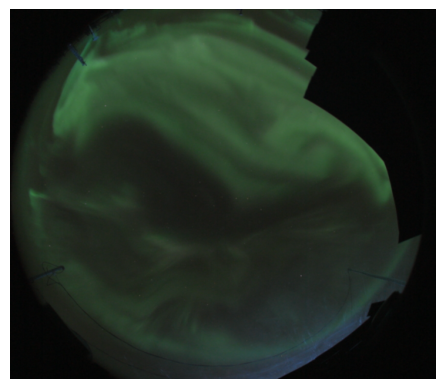

In [10]:
plt.imshow(img[:,:,:,0])
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [11]:
# remove the downloaded files
import os
os.remove(filename)